# 

In [76]:
import pandas as pd
import numpy as np

#데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
 
#선형회귀모델
import statsmodels.formula.api as smf
#잔차의 정규성 확인:qqplot, 회귀분석의 상수항 추가 :add_conㅃtant
from statsmodels.api import qqplot, add_constant
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#학습용/평가용 데이터 분리:train,test
from sklearn.model_selection import train_test_split
#선형회귀 모형
from sklearn.linear_model import LinearRegression
#변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
#평가함수
from sklearn.metrics import r2_score
#Ridge,Lasso,ElasticNet 패키지 불러오기
from sklearn.linear_model import Ridge,Lasso,ElasticNet



#나무구조 시각화
from sklearn.tree import plot_tree
#export_grahpviz:나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
#graphviz: 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
import graphviz
#예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
#예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
#예측/회귀 Graient Boosting
from sklearn.ensemble import GradientBoostingRegressor as GBR
#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV


#로지스틱 회귀
from statsmodels.api import Logit
#분류모댈 평가 함수
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
#분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
#분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
#최적 모델, 파라미터 탐색
from sklearn.ensemble import GradientBoostingClassifier as GBC
#분류 SVN
from sklearn.svm import SVC
#분류 NN(MLPClassifier)
from sklearn.neural_network import MLPClassifier
#분류 KNN
from sklearn.neighbors import KNeighborsClassifier



#패키지 불러오기
from xgboost import XGBClassifier
from xgboost import plot_importance
from lightgbm import LGBMClassifier
from lightgbm import plot_importance
from catboost import CatBoostClassifier
from statsmodels.stats.proportion import proportions_ztest
plt.rcParams["font.family"] = 'NanumGothicCoding'
matplotlib.rc("axes",unicode_minus = False)

#가설 검정 및 통계 분석 패키지
#import scipy
import scipy
from scipy import stats 
from statsmodels.formula.api import ols
#ANOVA 분석패키지
from statsmodels.stats.anova import anova_lm

#선형 회귀분석모델
from statsmodels.api import qqplot

#linkage: 계층형 군진 분석, dendrogram: 계층구조 나무, cluster: linkage로 부터 얻은 값으로 군집 생성
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
#군집 방법: AgglomerativeClustering(계층형), Kmeans(k-평균), DBSCAN
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
#실루엣(silhouette) 계수 산출
from sklearn.metrics import silhouette_samples, silhouette_score
#실루엣 계수 산출 및 시각화 라이브러리(pip install yellowbrick 실행)
from yellowbrick.cluster import SilhouetteVisualizer




import warnings
warnings.filterwarnings('ignore')

In [2]:
df_booking= pd.read_csv("/home/piai/바탕화면/A2_간편식/booking_data.csv")
df_error= pd.read_csv("/home/piai/바탕화면/A2_간편식/Error_Message.csv")
df_prod= pd.read_csv("/home/piai/바탕화면/A2_간편식/Product_Name.csv")
df_cook= pd.read_csv("/home/piai/바탕화면/A2_간편식/Cooking_data_set.csv")

# 1. 이상치 결측치 제거

In [3]:
# cook 결측치, 이상치 제거
df_cook = df_cook.dropna(subset=['품목코드'])  
df_cook = df_cook.dropna(subset=['품목명']) 
df_cook['실링온도'] = df_cook['실링온도'].fillna(df_cook.groupby('품목코드')['실링온도'].transform('mean'))
df_cook['쿠킹온도'] = df_cook['쿠킹온도'].fillna(df_cook.groupby('품목코드')['쿠킹온도'].transform('mean'))
df_cook['생산시간'] = df_cook['생산시간'].fillna(df_cook.groupby('품목코드')['생산시간'].transform('mean'))
df_cook = df_cook.dropna(subset=['생산시간'])  

In [4]:
# df_cook['생산일자'] = df_cook['생산일자'].str.replace('-', '').astype(int)
# df_error['생산일자'] = df_error['생산일자'].str.replace('-', '').astype(int)

In [5]:
# error 결측치, 이상치 제거
df_error = df_error.dropna(subset=['품목코드'])
df_error = df_error.dropna(subset=['품목명'])
df_error = df_error.dropna(subset=['품목명']) 
df_error = df_error[df_error['오류조치시간'] >= 0]

# 2. 그룹화

## 2.1 쿠킹 데이터에 불량여부(1)변수 추가

In [31]:
duplicate_mask = df_cook.duplicated(subset=['품목코드', '생산일자', '순번'], keep=False)
df_cook[duplicate_mask] 

,순번,생산라인코드,생산라인명,생산일자,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,품목세부분류
7271,1,D007,2동 6열컵실러#1,2015-12-30,16A06005,씨제이두부샐러드고구마-세트,W005,72.771924,123.871924,158.418674,23.031,198.956,76.038000,샐러드
7275,1,D007,2동 6열컵실러#1,2015-12-30,16A06005,씨제이두부샐러드고구마-세트,W005,69.310376,79.110376,113.533276,22.949,203.543,76.038000,샐러드
9827,18,D087,냉동밥 내포장#2,2017-05-10,1BA03200,비비고새우볶음밥210g(알밥),W005,72.919299,124.019299,158.566049,23.031,199.390,75.671041,볶음밥
9850,18,D087,냉동밥 내포장#2,2017-05-10,1BA03200,비비고새우볶음밥210g(알밥),W005,71.323077,94.123077,129.784277,23.774,209.746,76.780000,볶음밥
12273,18,C088,냉동밥 취반#1,2017-09-30,2BA03051,쉐프솔루션베이스볶음밥(시즌)500g(재),W003,71.350776,103.050776,138.139776,23.393,202.387,76.560000,볶음밥
12293,18,C088,냉동밥 취반#1,2017-09-30,2BA03051,쉐프솔루션베이스볶음밥(시즌)500g(재),W003,70.716081,115.016081,150.718881,23.802,211.684,72.210000,볶음밥
12917,11,C088,냉동밥 취반#1,2017-11-29,2BA03051,쉐프솔루션베이스볶음밥(시즌)500g(재),W003,72.157538,102.357538,137.487388,23.420,207.828,78.950000,볶음밥
12931,11,C088,냉동밥 취반#1,2017-11-29,2BA03051,쉐프솔루션베이스볶음밥(시즌)500g(재),W003,71.016230,107.216230,142.991480,23.850,207.224,74.600000,볶음밥
15096,2,D011,2동 오리히로,2018-05-21,13A00822,부대찌개육수T,W005,71.226839,92.426839,127.673889,23.498,203.683,70.650000,기타
15098,2,D011,2동 오리히로,2018-05-21,13A00822,부대찌개육수T,W005,71.270797,93.770797,129.048247,23.518,212.037,79.020000,기타


In [32]:
df_cook = df_cook.drop([21608, 21601, 19877, 19883, 9772, 9795, 21501, 21512])

In [33]:
results = []
for index, row in df_cook.iterrows():
    if df_error[(df_error['품목코드'] == row['품목코드']) & (df_error['생산일자'] == row['생산일자']) & (df_error['순번'] == row['순번'])].shape[0] > 0:
        results.append(1)
    else:
        results.append(0)
df_cook['불량여부(1)'] = results

In [34]:
results = []
for index, row in df_cook.iterrows():
    error_row = df_error[(df_error['품목코드'] == row['품목코드']) & (df_error['생산일자'] == row['생산일자']) & (df_error['순번'] == row['순번'])]
    if error_row.shape[0] > 0:
        row_dict = row.to_dict()
        error_dict = error_row[['오류조치시간', '오류발생작업장명','Error_Message']].to_dict('records')[0]
        row_dict.update(error_dict)
        results.append(row_dict)
    else:
        results.append(row.to_dict())
df_cook = pd.DataFrame(results)


In [36]:
df_cook

,순번,생산라인코드,생산라인명,생산일자,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,품목세부분류,불량여부(1),오류조치시간,오류발생작업장명,Error_Message
0,3,C001,쿠커 #1,2011-01-03,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,201.844,70.37,소스,0,NaN,NaN,NaN
1,1,C002,쿠커 #2,2011-01-03,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,212.043,70.83,샐러드,0,NaN,NaN,NaN
2,13,C003,쿠커 #3,2011-01-03,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,208.781,73.55,기타,0,NaN,NaN,NaN
3,7,C005,2동 쿠커 #4,2011-01-03,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,208.269,74.81,샐러드,0,NaN,NaN,NaN
4,2,C007,프리머 #1,2011-01-03,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179319,114.079318,149.928068,23.899,211.625,73.40,마요,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23944,7,D087,냉동밥 내포장#2,2021-10-28,1BA03638,(1)Homeplus signature 날치알이톡톡터지는날치알밥(알밥),W005,70.610616,103.710616,138.257466,23.031,199.343,72.49,볶음밥,1,20.0,충전실,공정
23945,9,D088,냉동밥 내포장#1,2021-10-29,1BA03515,(쿠팡)곰곰갈비맛치킨밥,W005,69.732381,98.432381,133.916831,23.656,213.413,76.63,볶음밥,0,NaN,NaN,NaN
23946,10,D088,냉동밥 내포장#1,2021-10-29,1BA03612,무명식당뿌리채소영양밥3kg,W005,71.459932,107.559932,143.598182,24.026,215.243,81.00,볶음밥,0,NaN,NaN,NaN
23947,4,D088,냉동밥 내포장#1,2021-10-29,1BA03606,콩콩푸드밥3kg,W005,70.664452,65.764452,100.773102,23.339,209.513,72.12,볶음밥,0,NaN,NaN,NaN


## 2.2 에러 데이터에 품목 세부 분류 변수 추가

In [6]:
def func1(row):
    if '볶음밥' in row:
        return '볶음밥'
    elif '소스' in row:
        return '소스'
    elif '마요' in row:
        return '마요'
    elif '비빔밥' in row:
        return '비빔밥'
    elif '나물밥' in row:
        return '비빔밥'
    elif '라이스' in row:
        return '볶음밥'
    elif '필라프' in row:
        return '볶음밥'
    elif '죽' in row:
        return '기타'
    elif '리조또' in row:
        return '기타'
    elif "밥" in row:
        return "볶음밥"
    elif "샐러드" in row:
        return "샐러드"
    elif "드레싱" in row:
        return "드레싱"
    elif '양념' in row:
        return '소스'
    else:
        return "기타"
df_error['품목세부분류'] = df_error['품목명'].apply(func1)

In [7]:
df_error['품목세부분류'].value_counts()

볶음밥    377
소스     218
마요     143
드레싱    106
기타      97
비빔밥     62
샐러드     51
Name: 품목세부분류, dtype: int64

In [8]:
df_볶음밥 = df_error[df_error['품목세부분류'] == '볶음밥']
df_볶음밥_충전실 = df_볶음밥[df_볶음밥['오류발생작업장명'] == '충전실']
df_볶음밥_쿠킹실 = df_볶음밥[df_볶음밥['오류발생작업장명'] == '쿠킹실']
df_볶음밥_계량실 = df_볶음밥[df_볶음밥['오류발생작업장명'] == '계량실']
df_볶음밥_포장실 = df_볶음밥[df_볶음밥['오류발생작업장명'] == '포장실']
df_소스 = df_error[df_error['품목세부분류'] == '소스']
df_소스_충전실 = df_소스[df_소스['오류발생작업장명'] == '충전실']
df_소스_쿠킹실 = df_소스[df_소스['오류발생작업장명'] == '쿠킹실']
df_소스_계량실 = df_소스[df_소스['오류발생작업장명'] == '계량실']
df_소스_포장실 = df_소스[df_소스['오류발생작업장명'] == '포장실']
df_마요네즈 = df_error[df_error['품목세부분류'] == '마요']
df_마요네즈_충전실 = df_마요네즈[df_마요네즈['오류발생작업장명'] == '충전실']
df_마요네즈_쿠킹실 = df_마요네즈[df_마요네즈['오류발생작업장명'] == '쿠킹실']
df_마요네즈_계량실 = df_마요네즈[df_마요네즈['오류발생작업장명'] == '계량실']
df_마요네즈_포장실 = df_마요네즈[df_마요네즈['오류발생작업장명'] == '포장실']

In [39]:
df_볶음밥 = df_cook[df_cook['품목세부분류'] == '볶음밥']
df_소스 = df_cook[df_cook['품목세부분류'] == '소스']
df_마요 = df_cook[df_cook['품목세부분류'] == '마요']
df_드레싱 = df_cook[df_cook['품목세부분류'] == '드레싱']


# 3. Pareto chart

## 3.1 제품별 불량 원인에 따른 불량품 비중

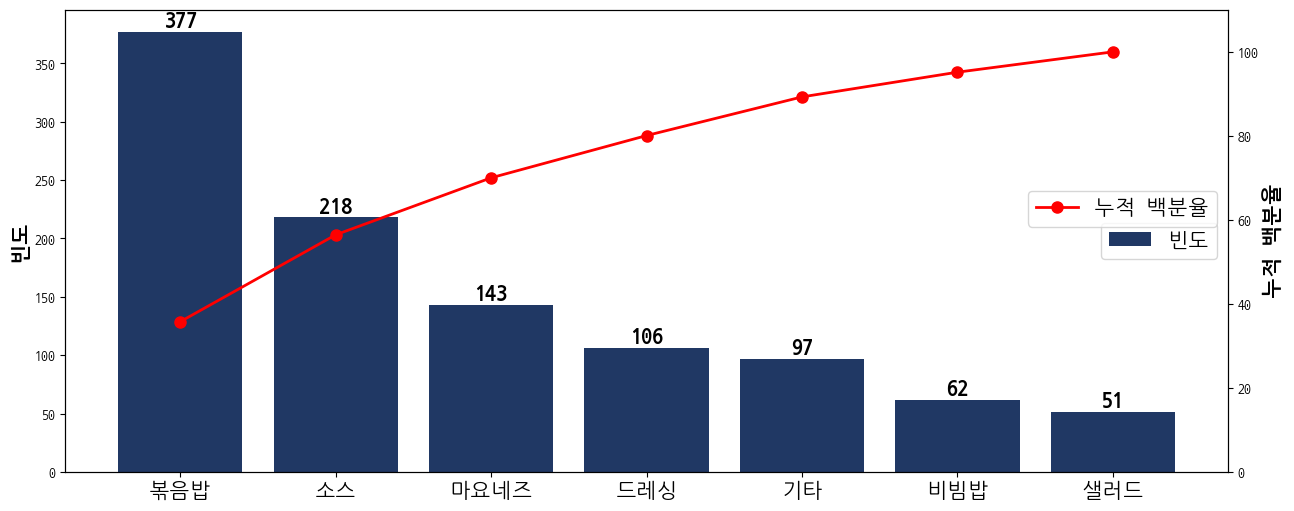

In [9]:
categories = ['볶음밥','소스','마요네즈','기타','드레싱','비빔밥','샐러드']
counts = [377,218,143,97,106,62,51]


sorted_data = sorted(zip(categories, counts), key=lambda x: x[1], reverse=True)
categories, counts = zip(*sorted_data)

# 항목별 비중 계산
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]
cumulative_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize = (15,6))

# 막대 그래프 그리기
bars = ax1.bar(categories, counts, color='#203864')
ax1.set_ylabel('빈도',fontsize = 15,fontweight='bold')
ax1.tick_params(axis='x', labelsize=15)
# 누적 백분율 곡선 그리기
ax2 = ax1.twinx()
ax2.plot(categories, cumulative_percentages, '-o', color='red', markersize=8, linewidth=2)
ax2.set_ylim([0, 110])
ax2.set_ylabel('누적 백분율',fontsize = 15,fontweight='bold')

# 범례 추가
ax1.legend(['빈도'], loc='center right', bbox_to_anchor=(1, 0.5), fontsize = 15)
ax2.legend(['누적 백분율'], loc='center right', bbox_to_anchor=(1, 0.57),fontsize = 15)

# 각 막대에 수량 값 표시
for bar, count in zip(bars, counts):
    ax1.annotate(str(count),fontsize= 16, fontweight='bold',xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 0),textcoords='offset points', ha='center', va='bottom')

# 축 레이블 설정


plt.show()

## 3.2 오류발생작업장명

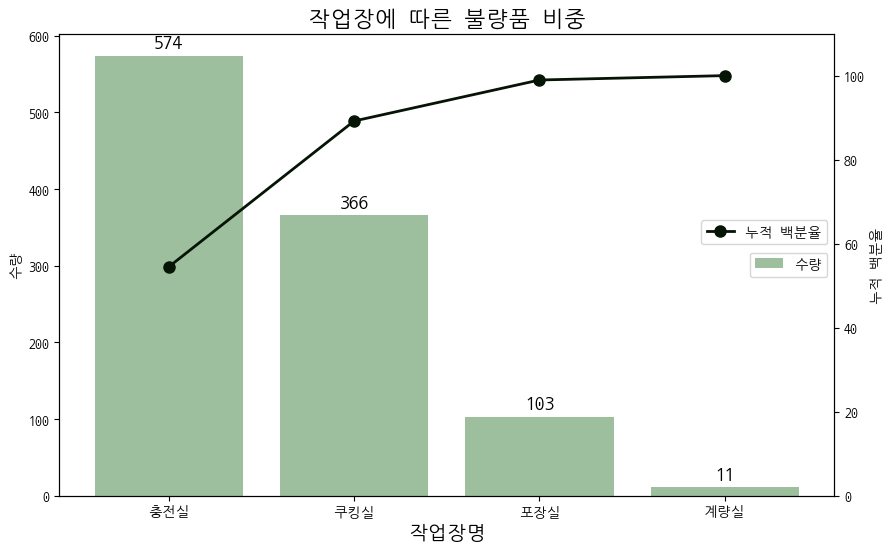

In [10]:
categories = ['충전실', '쿠킹실', '포장실', '계량실']
counts = [574,366,103,11]

sorted_data = sorted(zip(categories, counts), key=lambda x: x[1], reverse=True)
categories, counts = zip(*sorted_data)

# 항목별 비중 계산
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]
cumulative_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize = (10,6))

# 막대 그래프 그리기
bars = ax1.bar(categories, counts, color='#9DBF9E')
ax1.set_ylabel('수량')

# 누적 백분율 곡선 그리기
ax2 = ax1.twinx()
ax2.plot(categories, cumulative_percentages, '-o', color='#051405', markersize=8, linewidth=2)
ax2.set_ylim([0, 110])
ax2.set_ylabel('누적 백분율')

# 범례 추가
ax1.legend(['수량'], loc='center right', bbox_to_anchor=(1, 0.5))
ax2.legend(['누적 백분율'], loc='center right', bbox_to_anchor=(1, 0.57))

# 각 막대에 수량 값 표시
for bar, count in zip(bars, counts):
    ax1.annotate(str(count),fontsize=14, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3),textcoords='offset points', ha='center', va='bottom')

# 축 레이블 설정
ax1.set_xlabel('작업장명',fontsize=14)
plt.title('작업장에 따른 불량품 비중',fontsize=16)

plt.show()

## 3.3 볶음밥

### a) 볶음밥 오류 발생장

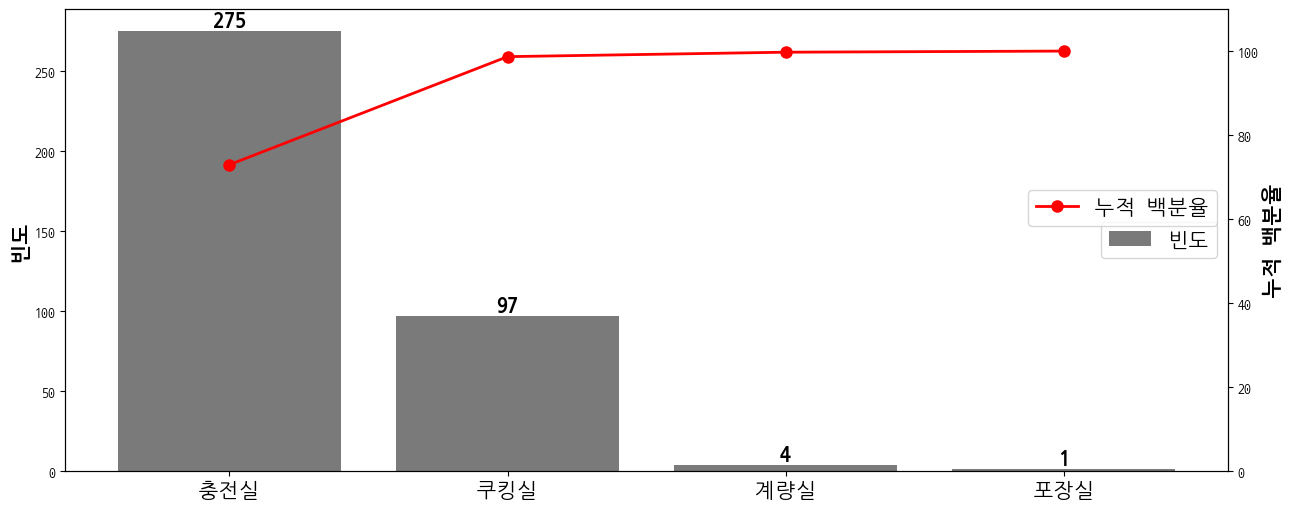

In [11]:
categories = ['충전실','쿠킹실','계량실','포장실']
counts = [275,97,4,1]

sorted_data = sorted(zip(categories, counts), key=lambda x: x[1], reverse=True)
categories, counts = zip(*sorted_data)

# 항목별 비중 계산
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]
cumulative_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize = (15,6))

# 막대 그래프 그리기
bars = ax1.bar(categories, counts, color='#7A7A7A')
ax1.set_ylabel('빈도',fontsize = 15,fontweight='bold')
ax1.tick_params(axis='x', labelsize=15)
# 누적 백분율 곡선 그리기
ax2 = ax1.twinx()
ax2.plot(categories, cumulative_percentages, '-o', color='red', markersize=8, linewidth=2)
ax2.set_ylim([0, 110])
ax2.set_ylabel('누적 백분율',fontsize = 15,fontweight='bold')

# 범례 추가
ax1.legend(['빈도'], loc='center right', bbox_to_anchor=(1, 0.5), fontsize = 15)
ax2.legend(['누적 백분율'], loc='center right', bbox_to_anchor=(1, 0.57),fontsize = 15)

# 각 막대에 수량 값 표시
for bar, count in zip(bars, counts):
    ax1.annotate(str(count),fontsize= 16, fontweight='bold',xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 0),textcoords='offset points', ha='center', va='bottom')

# 축 레이블 설정


plt.show()

### b) 볶음밥_충전실 오류메세지

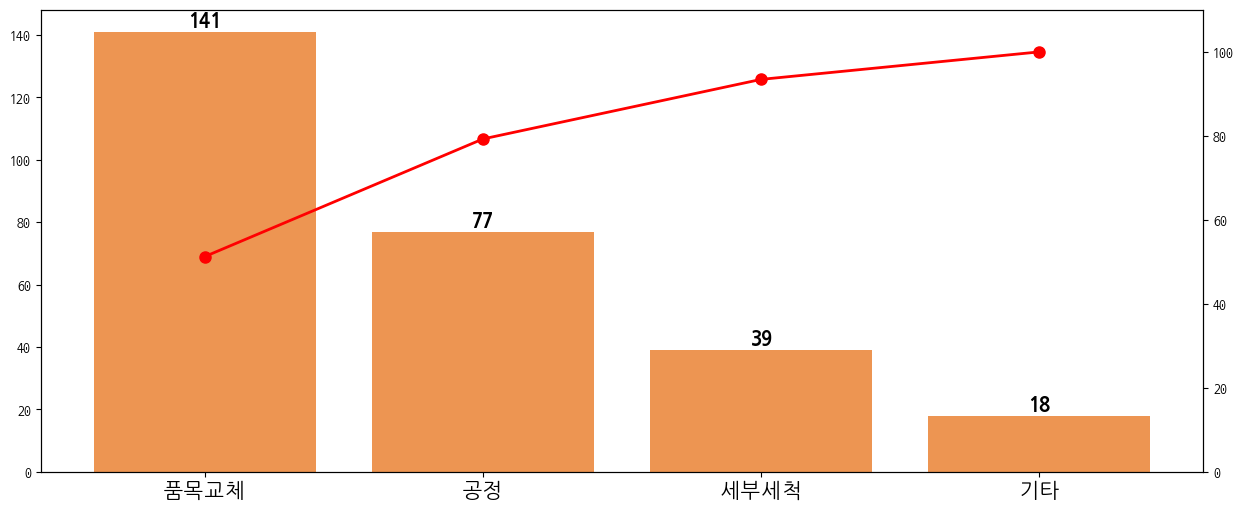

In [12]:
categories = ['품목교체','공정','세부세척','기타']
counts = [141,77,39,18]

sorted_data = sorted(zip(categories, counts), key=lambda x: x[1], reverse=True)
categories, counts = zip(*sorted_data)

# 항목별 비중 계산
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]
cumulative_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize = (15,6))

# 막대 그래프 그리기
bars = ax1.bar(categories, counts, color='#ED9552')

ax1.tick_params(axis='x', labelsize=15)
# 누적 백분율 곡선 그리기
ax2 = ax1.twinx()
ax2.plot(categories, cumulative_percentages, '-o', color='red', markersize=8, linewidth=2)
ax2.set_ylim([0, 110])



# 각 막대에 수량 값 표시
for bar, count in zip(bars, counts):
    ax1.annotate(str(count),fontsize= 16, fontweight='bold',xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 0),textcoords='offset points', ha='center', va='bottom')

# 축 레이블 설정


plt.show()

### c) 볶음밥_쿠킹실 에러메세지

<bound method _make_class_factory.<locals>.class_factory.<locals>.subcls.set of <AxesSubplot:xlabel='불량 원인', ylabel='수량'>>

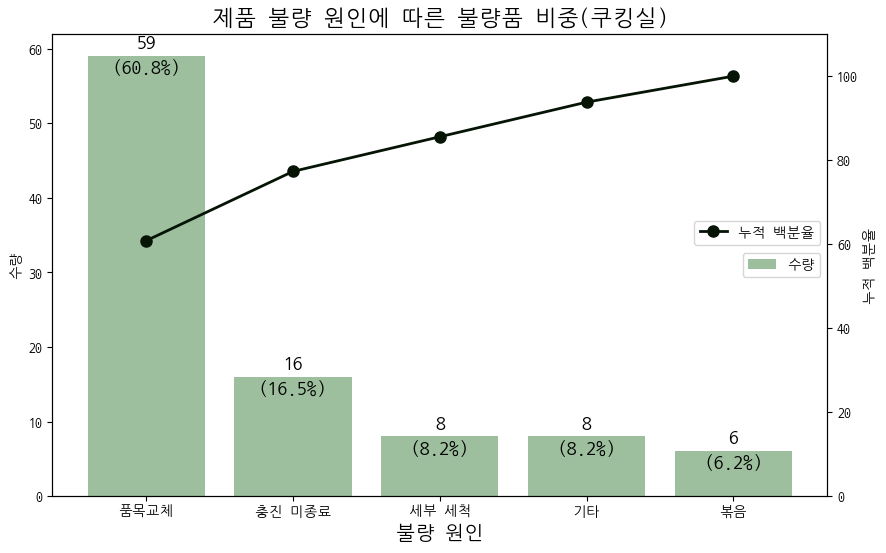

In [13]:
categories = ['품목교체','충진 미종료','세부 세척','볶음','기타']
counts = [59,16,8,6,8]

sorted_data = sorted(zip(categories, counts), key=lambda x: x[1], reverse=True)
categories, counts = zip(*sorted_data)

# 항목별 비중 계산
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]
cumulative_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10,6))

# 막대 그래프 그리기
bars = ax1.bar(categories, counts, color='#9DBF9E')
ax1.set_ylabel('수량')

# 누적 백분율 곡선 그리기
ax2 = ax1.twinx()
ax2.plot(categories, cumulative_percentages, '-o', color='#051405', markersize=8, linewidth=2)
ax2.set_ylim([0, 110])
ax2.set_ylabel('누적 백분율')

# 범례 추가
ax1.legend(['수량'], loc='center right', bbox_to_anchor=(1, 0.5))
ax2.legend(['누적 백분율'], loc='center right', bbox_to_anchor=(1, 0.57))

# 각 막대에 수량 값 및 비율 표시
for bar, count, percent in zip(bars, counts, percentages):
    # 수량 값 표시
    ax1.annotate(f"{count}", fontsize=14, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    # 비율 값 표시
    ax1.annotate(f"({percent:.1f}%)", fontsize=14, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, -15), textcoords='offset points', ha='center', va='bottom')

# 축 레이블 설정
ax1.set_xlabel('불량 원인', fontsize= 14)
plt.title('제품 불량 원인에 따른 불량품 비중(쿠킹실)',fontsize= 16)
ax1.set

## 3.4 소스 

### a) 소스 오류 발생장

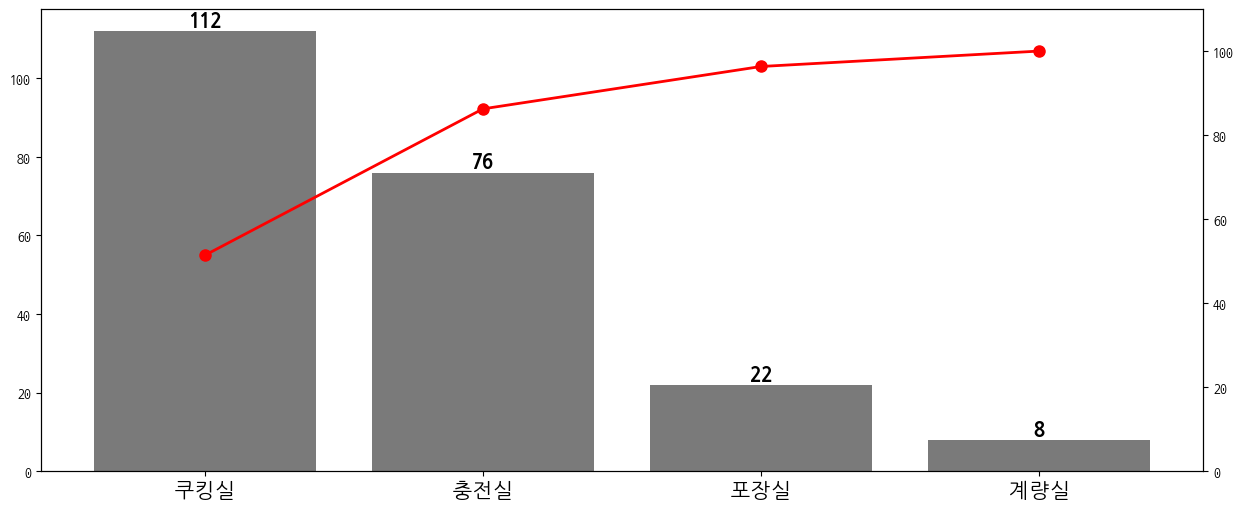

In [14]:
categories = ['쿠킹실','충전실','포장실','계량실']
counts = [112,76,22,8]

sorted_data = sorted(zip(categories, counts), key=lambda x: x[1], reverse=True)
categories, counts = zip(*sorted_data)

# 항목별 비중 계산
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]
cumulative_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize = (15,6))

# 막대 그래프 그리기
bars = ax1.bar(categories, counts, color='#7A7A7A')
# ax1.set_ylabel('빈도',fontsize = 15,fontweight='bold')
ax1.tick_params(axis='x', labelsize=15)
# 누적 백분율 곡선 그리기
ax2 = ax1.twinx()
ax2.plot(categories, cumulative_percentages, '-o', color='red', markersize=8, linewidth=2)
ax2.set_ylim([0, 110])
# ax2.set_ylabel('누적 백분율',fontsize = 15,fontweight='bold')

# 범례 추가
# ax1.legend(['빈도'], loc='center right', bbox_to_anchor=(1, 0.5), fontsize = 15)
# ax2.legend(['누적 백분율'], loc='center right', bbox_to_anchor=(1, 0.57),fontsize = 15)

# 각 막대에 수량 값 표시
for bar, count in zip(bars, counts):
    ax1.annotate(str(count),fontsize= 16, fontweight='bold',xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 0),textcoords='offset points', ha='center', va='bottom')

# 축 레이블 설정


plt.show()

### b) 소스_쿠킹실 에러메세지

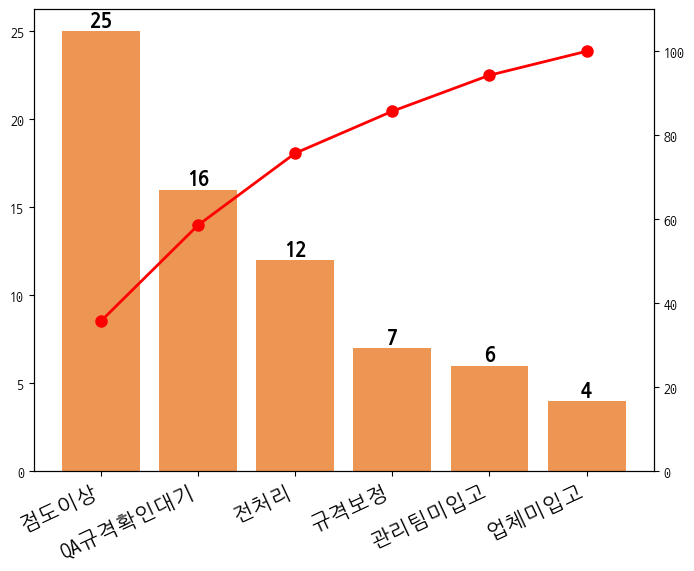

In [15]:
categories = ['점도이상','QA규격확인대기','전처리','규격보정','관리팀미입고','업체미입고']
counts = [25,16,12,7,6,4]

sorted_data = sorted(zip(categories, counts), key=lambda x: x[1], reverse=True)
categories, counts = zip(*sorted_data)

# 항목별 비중 계산
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]
cumulative_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize = (8,6))

# 막대 그래프 그리기
bars = ax1.bar(categories, counts, color='#ED9552')

ax1.tick_params(axis='x', labelsize=15)
# 누적 백분율 곡선 그리기
ax2 = ax1.twinx()
ax2.plot(categories, cumulative_percentages, '-o', color='red', markersize=8, linewidth=2)
ax2.set_ylim([0, 110])



# 각 막대에 수량 값 표시
for bar, count in zip(bars, counts):
    ax1.annotate(str(count),fontsize= 16, fontweight='bold',xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 0),textcoords='offset points', ha='center', va='bottom')

# 축 레이블 설정
ax1.set_xticklabels(categories, rotation=25, ha='right')

plt.show()

#### 기계 문제

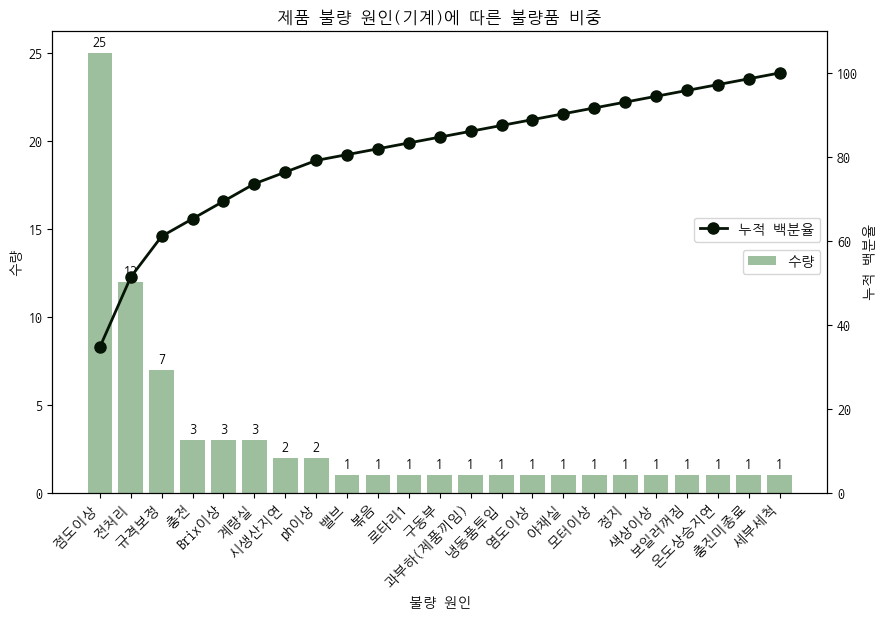

In [16]:
categories = ['점도이상','전처리','규격보정','충전','Brix이상','계량실','시생산지연','ph이상','밸브','볶음','로타리1','구동부','과부하(제품끼임)','냉동품투입','염도이상','야채실','모터이상','정지','색상이상','보일러꺼짐','온도상승지연','충진미종료','세부세척']
counts = [25,12,7,3,3,3,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

sorted_data = sorted(zip(categories, counts), key=lambda x: x[1], reverse=True)
categories, counts = zip(*sorted_data)

# 항목별 비중 계산
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]
cumulative_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize = (10,6))

# 막대 그래프 그리기
bars = ax1.bar(categories, counts, color='#9DBF9E')
ax1.set_ylabel('수량')

# 누적 백분율 곡선 그리기
ax2 = ax1.twinx()
ax2.plot(categories, cumulative_percentages, '-o', color='#051405', markersize=8, linewidth=2)
ax2.set_ylim([0, 110])
ax2.set_ylabel('누적 백분율')

# 범례 추가
ax1.legend(['수량'], loc='center right', bbox_to_anchor=(1, 0.5))
ax2.legend(['누적 백분율'], loc='center right', bbox_to_anchor=(1, 0.57))

# 각 막대에 수량 값 표시
for bar, count in zip(bars, counts):
    ax1.annotate(str(count), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3),textcoords='offset points', ha='center', va='bottom')

# 축 레이블 설정
ax1.set_xlabel('불량 원인')
ax1.set_xticklabels(categories, rotation=45, ha='right')
plt.title('제품 불량 원인(기계)에 따른 불량품 비중')

plt.show()

#### 인적문제

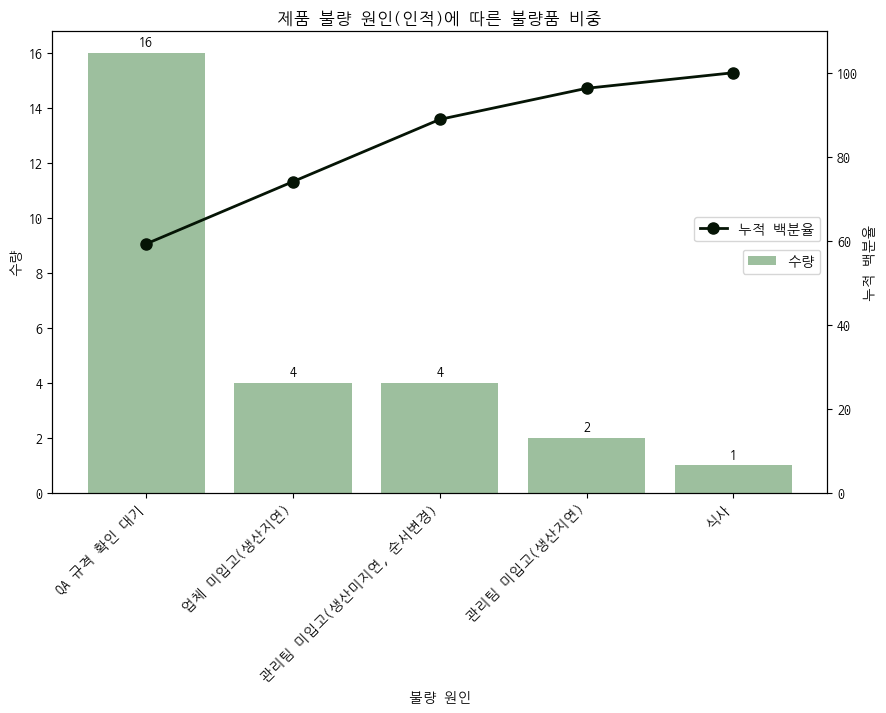

In [17]:
categories = ['QA 규격 확인 대기','업체 미입고(생산지연)','관리팀 미입고(생산미지연, 순서변경)','관리팀 미입고(생산지연)','식사']
counts = [16,4,4,2,1]

sorted_data = sorted(zip(categories, counts), key=lambda x: x[1], reverse=True)
categories, counts = zip(*sorted_data)

# 항목별 비중 계산
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]
cumulative_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize = (10,6))

# 막대 그래프 그리기
bars = ax1.bar(categories, counts, color='#9DBF9E')
ax1.set_ylabel('수량')

# 누적 백분율 곡선 그리기
ax2 = ax1.twinx()
ax2.plot(categories, cumulative_percentages, '-o', color='#051405', markersize=8, linewidth=2)
ax2.set_ylim([0, 110])
ax2.set_ylabel('누적 백분율')

# 범례 추가
ax1.legend(['수량'], loc='center right', bbox_to_anchor=(1, 0.5))
ax2.legend(['누적 백분율'], loc='center right', bbox_to_anchor=(1, 0.57))

# 각 막대에 수량 값 표시
for bar, count in zip(bars, counts):
    ax1.annotate(str(count), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3),textcoords='offset points', ha='center', va='bottom')

# 축 레이블 설정
ax1.set_xlabel('불량 원인')
ax1.set_xticklabels(categories, rotation=45, ha='right')
plt.title('제품 불량 원인(인적)에 따른 불량품 비중')

plt.show()

### c) 소스_충전실 에러메세지

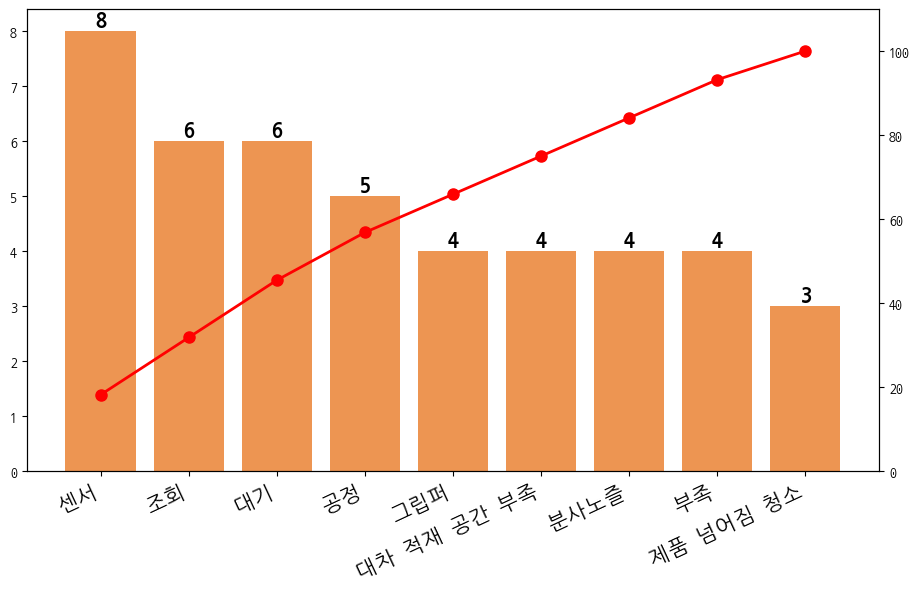

In [24]:
categories = ['센서','조회','대기','공정','그립퍼','대차 적재 공간 부족','분사노즐','부족','제품 넘어짐 청소']
counts = [8,6,6,5,4,4,4,4,3]

sorted_data = sorted(zip(categories, counts), key=lambda x: x[1], reverse=True)
categories, counts = zip(*sorted_data)

# 항목별 비중 계산
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]
cumulative_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize = (11,6))

# 막대 그래프 그리기
bars = ax1.bar(categories, counts, color='#ED9552')
# ax1.set_ylabel('빈도',fontsize = 15,fontweight='bold')
ax1.tick_params(axis='x', labelsize=15)
# 누적 백분율 곡선 그리기
ax2 = ax1.twinx()
ax2.plot(categories, cumulative_percentages, '-o', color='red', markersize=8, linewidth=2)
ax2.set_ylim([0, 110])
# ax2.set_ylabel('누적 백분율',fontsize = 15,fontweight='bold')

# 범례 추가
# ax1.legend(['빈도'], loc='center right', bbox_to_anchor=(1, 0.5), fontsize = 15)
# ax2.legend(['누적 백분율'], loc='center right', bbox_to_anchor=(1, 0.57),fontsize = 15)

# 각 막대에 수량 값 표시
for bar, count in zip(bars, counts):
    ax1.annotate(str(count),fontsize= 16, fontweight='bold',xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 0),textcoords='offset points', ha='center', va='bottom')

# 축 레이블 설정

ax1.set_xticklabels(categories, rotation=25, ha='right')

plt.show()

## 3.5 마요네즈

### a) 마요네즈 오류 발생장

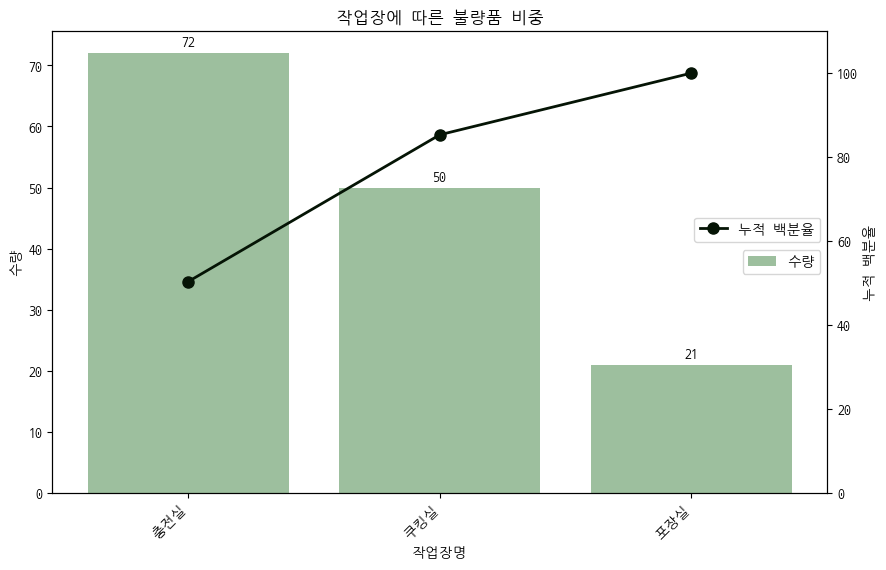

In [19]:
categories = ['충전실','쿠킹실','포장실']
counts = [72,50,21]

sorted_data = sorted(zip(categories, counts), key=lambda x: x[1], reverse=True)
categories, counts = zip(*sorted_data)

# 항목별 비중 계산
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]
cumulative_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize = (10,6))

# 막대 그래프 그리기
bars = ax1.bar(categories, counts, color='#9DBF9E')
ax1.set_ylabel('수량')

# 누적 백분율 곡선 그리기
ax2 = ax1.twinx()
ax2.plot(categories, cumulative_percentages, '-o', color='#051405', markersize=8, linewidth=2)
ax2.set_ylim([0, 110])
ax2.set_ylabel('누적 백분율')

# 범례 추가
ax1.legend(['수량'], loc='center right', bbox_to_anchor=(1, 0.5))
ax2.legend(['누적 백분율'], loc='center right', bbox_to_anchor=(1, 0.57))

# 각 막대에 수량 값 표시
for bar, count in zip(bars, counts):
    ax1.annotate(str(count), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3),textcoords='offset points', ha='center', va='bottom')

# 축 레이블 설정
ax1.set_xlabel('작업장명')
ax1.set_xticklabels(categories, rotation=45, ha='right')
plt.title('작업장에 따른 불량품 비중')

plt.show()

### b) 마요네즈_쿠킹실 에러메세지

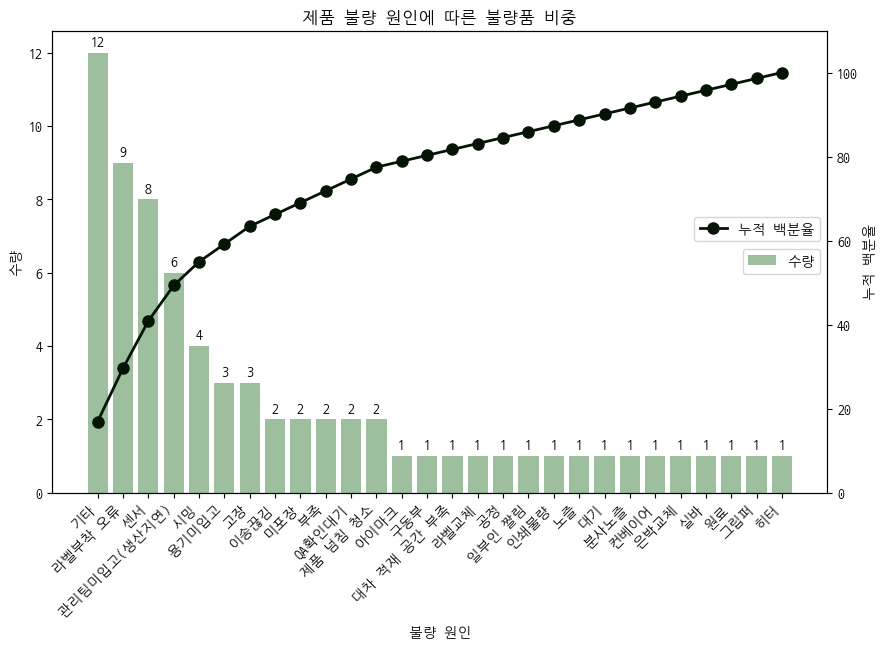

In [20]:
categories = ['기타','라벨부착 오류','센서','관리팀미입고(생산지연)','시밍','용기미입고','고장','이송끊김','미포장','부족','QA확인대기','제품 넘침 청소','아이마크','구동부','대차 적재 공간 부족','라벨교체','공정','일부인 짤림','인쇄불량','노즐','대기','분사노즐','컨베이어','은박교체','실바','원료','그립퍼','히터','연구확인대기']
counts = [12,9,8,6,4,3,3,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

sorted_data = sorted(zip(categories, counts), key=lambda x: x[1], reverse=True)
categories, counts = zip(*sorted_data)

# 항목별 비중 계산
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]
cumulative_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize = (10,6))

# 막대 그래프 그리기
bars = ax1.bar(categories, counts, color='#9DBF9E')
ax1.set_ylabel('수량')

# 누적 백분율 곡선 그리기
ax2 = ax1.twinx()
ax2.plot(categories, cumulative_percentages, '-o', color='#051405', markersize=8, linewidth=2)
ax2.set_ylim([0, 110])
ax2.set_ylabel('누적 백분율')

# 범례 추가
ax1.legend(['수량'], loc='center right', bbox_to_anchor=(1, 0.5))
ax2.legend(['누적 백분율'], loc='center right', bbox_to_anchor=(1, 0.57))

# 각 막대에 수량 값 표시
for bar, count in zip(bars, counts):
    ax1.annotate(str(count), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3),textcoords='offset points', ha='center', va='bottom')

# 축 레이블 설정
ax1.set_xlabel('불량 원인')
ax1.set_xticklabels(categories, rotation=45, ha='right')
plt.title('제품 불량 원인에 따른 불량품 비중')

plt.show()

### c) 마요네즈_충전실 에러메세지

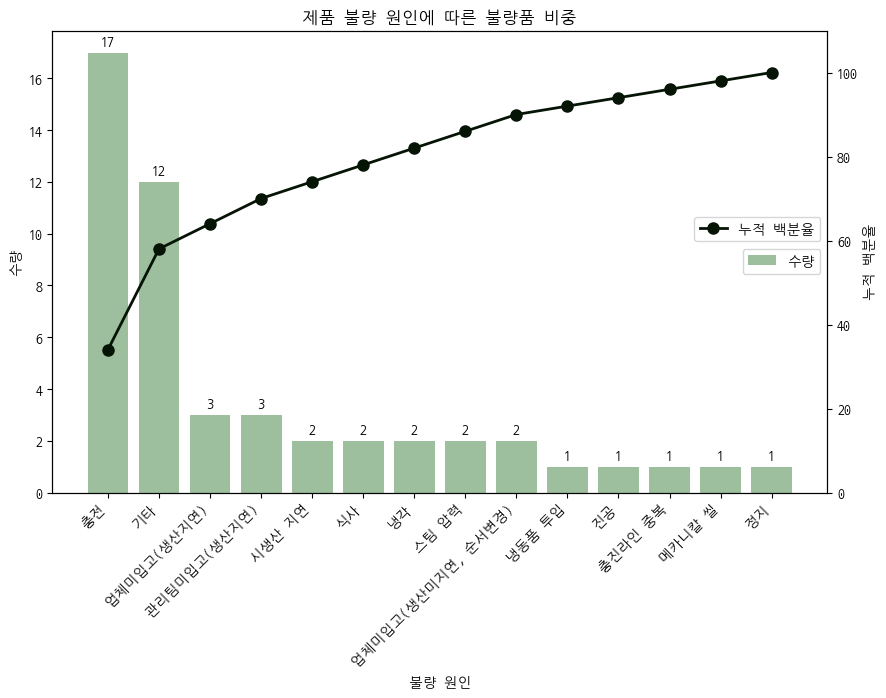

In [21]:
categories = ['충전','기타','업체미입고(생산지연)','관리팀미입고(생산지연)','시생산 지연','식사','냉각','스팀 압력','업체미입고(생산미지연, 순서변경)','냉동품 투입','진공','충진라인 중복','메카니칼 씰','정지']
counts = [17,12,3,3,2,2,2,2,2,1,1,1,1,1]

sorted_data = sorted(zip(categories, counts), key=lambda x: x[1], reverse=True)
categories, counts = zip(*sorted_data)

# 항목별 비중 계산
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]
cumulative_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize = (10,6))

# 막대 그래프 그리기
bars = ax1.bar(categories, counts, color='#9DBF9E')
ax1.set_ylabel('수량')

# 누적 백분율 곡선 그리기
ax2 = ax1.twinx()
ax2.plot(categories, cumulative_percentages, '-o', color='#051405', markersize=8, linewidth=2)
ax2.set_ylim([0, 110])
ax2.set_ylabel('누적 백분율')

# 범례 추가
ax1.legend(['수량'], loc='center right', bbox_to_anchor=(1, 0.5))
ax2.legend(['누적 백분율'], loc='center right', bbox_to_anchor=(1, 0.57))

# 각 막대에 수량 값 표시
for bar, count in zip(bars, counts):
    ax1.annotate(str(count), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3),textcoords='offset points', ha='center', va='bottom')

# 축 레이블 설정
ax1.set_xlabel('불량 원인')
ax1.set_xticklabels(categories, rotation=45, ha='right')
plt.title('제품 불량 원인에 따른 불량품 비중')

plt.show()

# 4 Boxplot

# 5. 소스 모델링

## 5.1 under sample

In [40]:
df_raw = df_볶음밥.loc[:,['충전실온도','실링압력','쿠킹스팀압력','불량여부(1)']]

In [51]:
mask = df_raw['불량여부(1)'] == 1
df_book_model1 = df_raw.loc[mask]
df_book_model1.info()
mask = df_raw['불량여부(1)'] == 0
df_book_model0 = df_raw.loc[mask]
df_book_model0.info()
df_book_model0_train, df_book_model0_test = train_test_split(df_book_model0, test_size=0.04, random_state=3000)
df_book_model0_test.info()
model_df = pd.concat([df_book_model1, df_book_model0_test])
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 7818 to 23944
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   충전실온도    374 non-null    float64
 1   실링압력     374 non-null    float64
 2   쿠킹스팀압력   374 non-null    float64
 3   불량여부(1)  374 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 14.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8467 entries, 6544 to 23947
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   충전실온도    8467 non-null   float64
 1   실링압력     8467 non-null   float64
 2   쿠킹스팀압력   8467 non-null   float64
 3   불량여부(1)  8467 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 330.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 12124 to 11968
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   충전실온도    339 non-null    float6

6544     0
6563     0
6604     0
6610     0
6620     0
        ..
23943    0
23944    1
23945    0
23946    0
23947    0
Name: 불량여부(1), Length: 8841, dtype: int64

In [59]:
df_y = model_df["불량여부(1)"]
df_x = model_df.drop("불량여부(1)", axis =1, inplace = False)

In [60]:
mask= ['충전실온도','실링압력','쿠킹스팀압력']
scaler = StandardScaler()
df_x[mask] = scaler.fit_transform(df_x[mask])

In [61]:
df_scaled_x = df_x

In [62]:
df_scaled_x

,충전실온도,실링압력,쿠킹스팀압력
7818,1.417517,-1.519979,-0.652491
8078,1.001644,-1.495093,-0.851708
8378,-2.583533,-1.469989,-1.227156
8379,-1.750897,-1.886282,-0.831275
8479,0.284430,-1.593764,-1.012614
...,...,...,...
14079,-0.663299,0.779786,0.486623
23258,1.494819,-0.431766,0.284852
18470,0.877748,0.747914,1.332019
18755,-0.685895,2.585107,1.339681


In [63]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_scaled_x,df_y,test_size= 0.3, random_state=42)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(499, 3)
train data Y size:(499,)
test data X size:(214, 3)
test data Y size:(214,)


## 5.1 랜덤포레스트

In [64]:
rf_uncustomized = RandomForestClassifier(random_state=42)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))


Score on training set: 1.000
Score on test set: 0.986


In [65]:
y_pred = rf_uncustomized.predict(df_test_x)

print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))

print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))

print(classification_report(df_test_y,y_pred, digits=3))

from sklearn.metrics import roc_curve, auc# y_test : 실제값, y_pred : 모델의 예측값 (0 또는 1)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
print("auc {}".format(roc_auc))

Accuracy on training set: 1.000
Accuracy on test set: 0.986
Confusion matrix: 
[[ 92   0]
 [  3 119]]
              precision    recall  f1-score   support

           0      0.968     1.000     0.984        92
           1      1.000     0.975     0.988       122

    accuracy                          0.986       214
   macro avg      0.984     0.988     0.986       214
weighted avg      0.986     0.986     0.986       214

auc 0.9877049180327868


In [66]:
from sklearn.metrics import roc_curve, auc# y_test : 실제값, y_pred : 모델의 예측값 (0 또는 1)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
print("auc {}".format(roc_auc))

auc 0.9877049180327868


## 5.2 그래디언트

In [80]:
gb_uncustomized = GBC(random_state=42)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))


Accuracy on training set: 1.000
Accuracy on test set: 0.981


In [81]:
# gb_final.fit(x_resampled,y_resampled)
y_pred = gb_uncustomized.predict(df_test_x)

print("Accuracy on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))

print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))

print(classification_report(df_test_y,y_pred, digits=3))

from sklearn.metrics import roc_curve, auc# y_test : 실제값, y_pred : 모델의 예측값 (0 또는 1)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
print("auc {}".format(roc_auc))

Accuracy on training set: 1.000
Accuracy on test set: 0.981
Confusion matrix: 
[[ 91   1]
 [  3 119]]
              precision    recall  f1-score   support

           0      0.968     0.989     0.978        92
           1      0.992     0.975     0.983       122

    accuracy                          0.981       214
   macro avg      0.980     0.982     0.981       214
weighted avg      0.982     0.981     0.981       214

auc 0.9822701354240911


## 5.3 DecisionTree

In [82]:
tree_uncustomized = DecisionTreeClassifier(random_state=42)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:1.000
Accuracy on test set: 0.981


In [83]:
y_pred = tree_uncustomized.predict(df_test_x)
print('Train Accuracy:{0:.3f}\n'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Test Accuracy:{0:.3f}\n'.format(tree_uncustomized.score(df_test_x, df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred))) 
print(classification_report(df_test_y,y_pred, digits=3))

from sklearn.metrics import roc_curve, auc# y_test : 실제값, y_pred : 모델의 예측값 (0 또는 1)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
print("auc {}".format(roc_auc))

Train Accuracy:1.000

Test Accuracy:0.981

Confusion matrix:
[[ 91   1]
 [  3 119]]
              precision    recall  f1-score   support

           0      0.968     0.989     0.978        92
           1      0.992     0.975     0.983       122

    accuracy                          0.981       214
   macro avg      0.980     0.982     0.981       214
weighted avg      0.982     0.981     0.981       214

auc 0.9822701354240911


## 5.4 KNN

In [84]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set: {:.3f}".format(knn_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(knn_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 0.980
Accuracy on test set: 0.967


In [85]:

y_pred = knn_uncustomized.predict(df_test_x)

print("Accuracy on training set: {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))

print("Accuracy on test set: {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))

print(classification_report(df_test_y,y_pred, digits=3))

print()
print()

from sklearn.metrics import roc_curve, auc# y_test : 실제값, y_pred : 모델의 예측값 (0 또는 1)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
print("auc: {}".format(roc_auc))

Accuracy on training set: 0.980
Accuracy on test set: 0.967
Confusion matrix: 
[[ 90   2]
 [  5 117]]
              precision    recall  f1-score   support

           0      0.947     0.978     0.963        92
           1      0.983     0.959     0.971       122

    accuracy                          0.967       214
   macro avg      0.965     0.969     0.967       214
weighted avg      0.968     0.967     0.967       214



auc: 0.9686386315039202


## 5.5 인공신경망

In [86]:
nn_uncustomized = MLPClassifier(random_state = 42)
nn_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x,df_test_y)))


Accuracy on training set: 0.982
Accuracy on test set: 0.977


In [87]:

y_pred = nn_uncustomized.predict(df_test_x)

print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))

print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))

print(classification_report(df_test_y,y_pred, digits=3))

print()
from sklearn.metrics import roc_curve, auc# y_test : 실제값, y_pred : 모델의 예측값 (0 또는 1)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
print("auc: {}".format(roc_auc))

Accuracy on training set: 0.982
Accuracy on test set: 0.977
Confusion matrix: 
[[ 90   2]
 [  3 119]]
              precision    recall  f1-score   support

           0      0.968     0.978     0.973        92
           1      0.983     0.975     0.979       122

    accuracy                          0.977       214
   macro avg      0.976     0.977     0.976       214
weighted avg      0.977     0.977     0.977       214


auc: 0.9768353528153955


## 5.6 SVM

In [88]:
svm_uncustomized = SVC(random_state = 42)
svm_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))


Accuracy on training set: 0.976
Accuracy on test set: 0.981


In [89]:

y_pred = svm_uncustomized.predict(df_test_x)

print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))

print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))

print(classification_report(df_test_y,y_pred, digits=3))
from sklearn.metrics import roc_curve, auc# y_test : 실제값, y_pred : 모델의 예측값 (0 또는 1)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
print("auc: {}".format(roc_auc))

Accuracy on training set: 0.976
Accuracy on test set: 0.981
Confusion matrix: 
[[ 91   1]
 [  3 119]]
              precision    recall  f1-score   support

           0      0.968     0.989     0.978        92
           1      0.992     0.975     0.983       122

    accuracy                          0.981       214
   macro avg      0.980     0.982     0.981       214
weighted avg      0.982     0.981     0.981       214

auc: 0.9822701354240911
